# Web Scraping Aparments

## General Approach

If not all data is in tables, we can use the `BeautifulSoup` library to scrape the data from the website. This library allows us to parse the HTML and extract the data we need.

## Steps

1. We will use requests library to get the HTML content of the website.
2. We will use BeautifulSoup to parse the HTML content.
3. We will extract the data we need from the HTML content using BeautifulSoup methods.
4. We will store the data in a pandas DataFrame.
5. Optionally we might clean the data.
6. We could analyize the data.
7. We could visualize the data.
8. We will save the data in a CSV or Excel file.

In [2]:
# let's start with needed standard libraries
# Python version
import sys
print(f"Python version: {sys.version}")
import time # for pausing our web requests so we do not spam the server
from datetime import datetime # for timestamps

# now external libraries
# for web requests
import requests # most crucial library for web scraping
print(f"requests version: {requests.__version__}")

# we will want BeautifulSoup to parse the HTML
from bs4 import BeautifulSoup
# if you do not have BeautifulSoup, you can install it with pip
# !pip install beautifulsoup4 from Notebook
# or
# !pip3 install beautifulsoup4 from terminal for Mac or Linux
# or
# pip install beautifulsoup4 from terminal for Windows
# homepage of BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/

# finally we need Pandas to store the data
import pandas as pd
print(f"Pandas version: {pd.__version__}")

Python version: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
requests version: 2.32.3
Pandas version: 2.2.2


In [3]:
# we know the url what we want to scrape
url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
print(f"We will scrape the following URL: {url}")

We will scrape the following URL: https://www.ss.com/lv/real-estate/flats/riga/centre/sell/


In [4]:
# now we will make a get request to the server at the given URL
response = requests.get(url) # just like our JSON example from last lesson
# there are also post requests and a few others, but get is the most common
# let's check the response and raise error if not 200
if response.status_code != 200:
    raise Exception("Failed to load page")
else:
    print(f"Page loaded successfully from {url}")

Page loaded successfully from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/


In [5]:
# response is not json it is text but marked as HTML
# we could see simply text
# first 1000 characters
print(response.text[:1000])

<!DOCTYPE html>
<HTML lang="lv"><HEAD>
<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>
<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">
<meta name="viewport" content="user-scalable=1, width=device-width, initial-scale=1.0"/>
<meta name="keywords" content="Sludinājumi centrs rīga dzīvokļi nekustamie īpašumi cenas istabu dzīvokli dzīvoklis pārdod centrā pērk izīrē  īrē  maina dažādi">
<meta name="description" content="Sludinājumi. Dzīvokļi - Rīga - Centrs, Cenas, tirdzniecība, Foto, Attēli, Pārdod">
<link rel="alternate" media="only screen and (max-width: 640px)" href="https://m.ss.com/lv/real-estate/flats/riga/centre/sell/">

<meta http-equiv="imagetoolbar" content="no">

<BASE href="https://www.ss.com/">
<link href="https://i.ss.com/w_inc/style.css?v=254" rel="stylesheet" />
<style>html{overflow-y:scroll;}.page_bg{background-image:url('https://i.ss.com/img/head/classifieds.jpg?v=1' );background-repeat:no-repeat;}@media screen 


In [8]:
# I could do some search and parsing by hand but not recommended
# for example I could look for Valdemāra in the html
needle = "Valdemāra"
if needle in response.text:
    print(f"Found {needle} in the HTML")
# how many times it is in the HTML
print(f"{needle} is {response.text.count(needle)} times in the HTML")
# index of the first occurrence
print(f"First occurrence of {needle} is at index {response.text.find(needle)}")
# print 90 characters around first occurrence
print(response.text[response.text.find(needle)-45:response.text.find(needle)+45])
# not very useful and hard to work with

# much better it is to let BeautifulSoup to parse the HTML for us

Found Valdemāra in the HTML
Valdemāra is 7 times in the HTML
First occurrence of Valdemāra is at index 16944
e="5445">Vagonu</option><option value="4545">Valdemāra</option><option value="5459">Valmie


In [9]:
# so we will creat soup object
soup = BeautifulSoup(response.text, 'lxml') # this does not use internet
# generally lxml is faster than html.parser, html.parser is built in
# but lxml is faster and more lenient
# print title
print(soup.title)

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>


In [11]:
# let us find table row that has id with value head_line in it
# we will use find method
# we will find first occurrence
head_line = soup.find("tr", {"id": "head_line"})
# so we said we want tr tag with id attribute with value head_line
# note how we used dictionary to pass attributes

# in this case soup has all of our HTML
# but soup could have had a section of the HTML page
# print head_line
print(head_line)


<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [12]:
# now let us get all text from each table cell in head_line row
# we will use find_all method
table_cells = head_line.find_all("td") # td stands for table data
# MDN documentation for td: https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td
# print table_cells
print(table_cells)

[<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>, <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td>, <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td>, <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>, <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title="">Stāvs</a

In [13]:
# now we can get text from each cell
# we will use text attribute
headline_texts = [cell.text for cell in table_cells] # list comprehension
# print headline_texts
print(headline_texts)

['\n\xa0Sludinājumi\r\n\n\n\ndatums\n', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']


In [14]:
# now let us create a function that given a soup object
# will return a list of texts from each cell in the head_line row
# we will have id as an optional parameter with head_line as default
# we will have an optional parameter to skip first n cells
# also we will provide some starting cell values as a tuple
def get_column_names(soup, id="head_line", skip=1, start=("URL","Description")):
    # again default values should not be list or dictionary!
    # find the row
    row = soup.find("tr", {"id": id})
    # find all cells
    cells = row.find_all("td")
    # skip first skip cells
    cells = cells[skip:] # if skip is 0 nothing will change
    # get text from each cell
    texts = [cell.text for cell in cells]
    # return from skip to the end
    return list(start) + texts # we will concatenate two lists

# let's test our function
column_names = get_column_names(soup)
print(column_names)

['URL', 'Description', 'Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']


In [15]:
# now let us get all table rows
all_rows = soup.find_all("tr")
# how many rows we have
print(f"We have {len(all_rows)} rows")

We have 39 rows


In [17]:
# we are a bit lucky that we have id starting with tr_
# so we can filter out only rows with id starting with tr_
# if we did not have this we could just hardcode the number of rows to skip
# let's write a loop to find all rows with id starting with tr_
apartment_rows = []
for row in all_rows:
    # we are using get with default value of ""
    # so in case row does not have id attribute it will return ""
    # then we can check if it starts with tr_
    if row.get("id", "").startswith("tr_"):
        # we do not want those that start with tr_bnr - banner ad?
        if not row.get("id", "").startswith("tr_bnr"):
            apartment_rows.append(row)
    # we could have rewritten this with regular expression
    # but above is simple enough

# how many apartment rows we have
print(f"We have {len(apartment_rows)} apartment rows")

We have 30 apartment rows


In [18]:
# so let's write above cell as a function that gets all apartment rows from a soup object
# we will have optional prefix to include tr_
# and exclude prefix default tr_bnr
def get_apartment_rows(soup, prefix="tr_", exclude="tr_bnr"):
    # get all rows
    all_rows = soup.find_all("tr")
    # filter out rows
    apartment_rows = []
    for row in all_rows:
        if row.get("id", "").startswith(prefix):
            if not row.get("id", "").startswith(exclude):
                apartment_rows.append(row)
    return apartment_rows

# let's test our function
apartment_rows = get_apartment_rows(soup)
# assert we have 30 - of course last page might not have 30... )
assert len(apartment_rows) == 30

In [19]:
# now we have our apartment let's get a single apartment
single_apartment = apartment_rows[0]
# print single_apartment
print(single_apartment)

<tr id="tr_52709345"><td class="msga2 pp0"><input id="c52709345" name="mid[]" type="checkbox" value="52709345_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="im52709345"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/6/1033/258153/51630566.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTk2JUFGJThDeiVBRnpmJUVBJTk2JUFGJThEJTdEJUFBd2glOUUlOTklQjAlODglN0UlQUNzZiU5RSU5NSVBQQ==|ezTFxC2n" href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="dm_52709345"> Tikko pēc kapitāla remonta. Augstais stāvs, kā otrais. 
Daļa m</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Katrīnas d. 24k3</td><td c="1" class="msga2-o pp6" nowrap="">3</td><td c="1" class="msga2-o pp6" nowrap="">66</td><td c="1" class="msga2-o pp6" nowrap="">1/2</td><td c="1" class="msga2-o pp6" nowrap="">Specpr.</td><td c="1" class="msga2-o pp6" nowrap="">1,286 €</td><td c="1" class="msga2-o pp6" nowrap="">84,860  €</td></tr>


In [20]:
# let's get all table cells from the single apartment
single_apartment_cells = single_apartment.find_all("td")
# print single_apartment_cells
print(single_apartment_cells)

[<td class="msga2 pp0"><input id="c52709345" name="mid[]" type="checkbox" value="52709345_1106_0"/></td>, <td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="im52709345"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/6/1033/258153/51630566.th2.jpg"/></a></td>, <td class="msg2"><div class="d1"><a class="am" data="JTk2JUFGJThDeiVBRnpmJUVBJTk2JUFGJThEJTdEJUFBd2glOUUlOTklQjAlODglN0UlQUNzZiU5RSU5NSVBQQ==|ezTFxC2n" href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="dm_52709345"> Tikko pēc kapitāla remonta. Augstais stāvs, kā otrais. 
Daļa m</a></div></td>, <td c="1" class="msga2-o pp6" nowrap="">Katrīnas d. 24k3</td>, <td c="1" class="msga2-o pp6" nowrap="">3</td>, <td c="1" class="msga2-o pp6" nowrap="">66</td>, <td c="1" class="msga2-o pp6" nowrap="">1/2</td>, <td c="1" class="msga2-o pp6" nowrap="">Specpr.</td>, <td c="1" class="msga2-o pp6" nowrap="">1,286 €</td>, <td c="1" class="msga2-o pp6" nowrap="">84,860  €</td>]


In [21]:
# so first one is a checkbox we do not need it
# second one is more intersting
# let's get the second cell
second_cell = single_apartment_cells[1]
# print second_cell
print(second_cell)

<td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="im52709345"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/6/1033/258153/51630566.th2.jpg"/></a></td>


In [22]:
# now let us extract url from anchor link inside second cell
# we will use find method then get method
# we will get href attribute
anchor = second_cell.find("a")
# print anchor
print(anchor)

<a href="/msg/lv/real-estate/flats/riga/centre/ecikp.html" id="im52709345"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/6/1033/258153/51630566.th2.jpg"/></a>


In [23]:
# now let us get href attribute
url = anchor.get("href")
# print url
print(url)

/msg/lv/real-estate/flats/riga/centre/ecikp.html


In [24]:
# let's add prefix to the url
prefix = "https://www.ss.com"
full_url = prefix + url
# print full_url
print(full_url)

https://www.ss.com/msg/lv/real-estate/flats/riga/centre/ecikp.html


In [25]:
# let us get text from rest of the cells after second
# we will skip first two cells
# we will use list comprehension
texts = [cell.text for cell in single_apartment_cells[2:]]
# print texts
print(texts)

['\xa0Tikko pēc kapitāla remonta. Augstais stāvs, kā otrais. \r\nDaļa m', 'Katrīnas d. 24k3', '3', '66', '1/2', 'Specpr.', '1,286 €', '84,860  €']


In [26]:
# let us create a function that will take a single apartment row
# it will have column names as a parameter
# will give url_td as a parameter default 1 - second cell
# finally we will have default parameter for url_prefix as "https://www.ss.com"
def get_ad_dict(single_apartment, column_names, 
                url_td=1, 
                skip_cells=2, # for skipping cells without text
                url_prefix="https://www.ss.com"):
    # get all cells
    cells = single_apartment.find_all("td")
    # get url cell
    url_cell = cells[url_td]
    # get anchor
    anchor = url_cell.find("a")
    # get href attribute
    url = anchor.get("href")
    # get full url
    full_url = url_prefix + url
    # get text from rest of the cells
    texts = [cell.text for cell in cells[skip_cells:]]
    texts = [full_url] + texts # we add full_url to the beginning
    # return dictionary
    return dict(zip(column_names, texts))

# let's test our function
ad_dict = get_ad_dict(single_apartment, column_names)
# print ad_dict
print(ad_dict)
# so why use dictionary we will see that it is easy to transform to pandas DataFrame
# but first we need to get all ads

{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/ecikp.html', 'Description': '\xa0Tikko pēc kapitāla remonta. Augstais stāvs, kā otrais. \r\nDaļa m', 'Iela': 'Katrīnas d. 24k3', 'Ist.': '3', 'm2': '66', 'Stāvs': '1/2', 'Sērija': 'Specpr.', 'Cena, m2': '1,286 €', 'Cena': '84,860  €'}


In [27]:
# if we know how to get one, we can get all
# let's make a function to get all from soup
# also inside we will get column names
def get_all_ads(soup):
    # get column names
    column_names = get_column_names(soup)
    # get apartment rows
    apartment_rows = get_apartment_rows(soup)
    # create a list of dictionaries - good format to feed Pandas DataFrame
    ads = [get_ad_dict(row, column_names) for row in apartment_rows]
    return ads

# let's test our function
ads = get_all_ads(soup)
# print ads
print(ads)

[{'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/ecikp.html', 'Description': '\xa0Tikko pēc kapitāla remonta. Augstais stāvs, kā otrais. \r\nDaļa m', 'Iela': 'Katrīnas d. 24k3', 'Ist.': '3', 'm2': '66', 'Stāvs': '1/2', 'Sērija': 'Specpr.', 'Cena, m2': '1,286 €', 'Cena': '84,860  €'}, {'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/becimg.html', 'Description': 'Tiek pārdots saulains, kluss 3 istabu dzīvoklis Rīgas centrā – T', 'Iela': 'Tērbatas 59/61', 'Ist.': '3', 'm2': '68', 'Stāvs': '6/6', 'Sērija': 'Renov.', 'Cena, m2': '2,426 €', 'Cena': '165,000  €'}, {'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/begxxx.html', 'Description': '1872. gadā arhitekta R. A. Pflūga projektētais četru stāvu dzīvo', 'Iela': 'Valdemāra 17', 'Ist.': '4', 'm2': '127', 'Stāvs': '2/5', 'Sērija': 'Renov.', 'Cena, m2': '2,605 €', 'Cena': '330,800  €'}, {'URL': 'https://www.ss.com/msg/lv/real-estate/flats/riga/centre/begmhe.html', 'Description': 'Vēlies pamosti

In [28]:
# let's make a function that makes a dataframe given a soup
def get_ads_df(soup):
    # get all ads
    ads = get_all_ads(soup)
    # create DataFrame
    df = pd.DataFrame(ads) # DataFrame class takes list of dictionaries
    return df

# let's test our function
df = get_ads_df(soup)
# print df shape
print(df.shape)
# head
df.head()

(30, 9)


,URL,Description,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Tikko pēc kapitāla remonta. Augstais stāvs, k...",Katrīnas d. 24k3,3,66,1/2,Specpr.,"1,286 €","84,860 €"
1,https://www.ss.com/msg/lv/real-estate/flats/ri...,"Tiek pārdots saulains, kluss 3 istabu dzīvokli...",Tērbatas 59/61,3,68,6/6,Renov.,"2,426 €","165,000 €"
2,https://www.ss.com/msg/lv/real-estate/flats/ri...,1872. gadā arhitekta R. A. Pflūga projektētais...,Valdemāra 17,4,127,2/5,Renov.,"2,605 €","330,800 €"
3,https://www.ss.com/msg/lv/real-estate/flats/ri...,Vēlies pamosties ar skatu uz Latvijas Nacionāl...,Valdemāra 17,3,75,3/5,Renov.,"2,657 €","199,238 €"
4,https://www.ss.com/msg/lv/real-estate/flats/ri...,1872. gadā arhitekta R. A. Pflūga projektētais...,Valdemāra 17,1,34,4/5,Renov.,"2,626 €","89,300 €"


In [29]:
# let us save as excel with datetime in the name
# we will use to_excel method
# we will use datetime.now() to get current datetime
# we will use strftime method to format datetime as string

now = datetime.now()
now_str = now.strftime("%Y_%m_%d_%H_%M_%S") # _ are just separators
filename = f"ss_com_{now_str}.xlsx"
df.to_excel(filename, index=False) # we do not want index column

In [30]:
# now that we know how to extract full info from single page 
# let us find out how many pages to extract
# first let us find all anchors
# we will use find_all method
all_anchors = soup.find_all("a")
# how many
print(f"We have {len(all_anchors)} anchors")

We have 99 anchors


In [31]:
# we could look for anchor with name nav_id but we have a bunch of those
# instead let us look for anchor with rel attribute and value prev
# we will use find method
# we will use dictionary to pass attributes
prev_anchor = soup.find("a", {"rel": "prev"})
# print prev_anchor
print(prev_anchor)

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page36.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>


In [33]:
# now we need to extract the number from the href attribute
# we could use regular expression but we can also use split
# first let us split by /page and get the second part
# then split by . and get the first part
href = prev_anchor.get("href")
# print href
print(href)
page = href.split("/page")[1].split(".")[0]
# finally we need to convert to integer
page = int(page)
print(f"Last page is {page}")

/lv/real-estate/flats/riga/centre/sell/page36.html
Last page is 36


In [43]:
# let us create a function that will return a list of urls to explore given a soup
def get_all_urls(soup, url="https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"):
    urls = [url] # we know we will want the first page
    # get prev anchor
    prev_anchor = soup.find("a", {"rel": "prev"})
    # check if we have prev anchor
    if not prev_anchor:
        return urls # we have no more pages just original
    # get href attribute
    href = prev_anchor.get("href")
    # get page number
    page = int(href.split("/page")[1].split(".")[0])
    # add a list of urls starting from 2nd
    urls += [f"{url}page{p}.html" for p in range(2, page+1)]
    return urls

# let's test our function
urls = get_all_urls(soup)
# print urls
print(urls)

['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page12.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page13.html', 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page14.html', 'https://w

In [41]:
# let us create a function that will take a url and return one big dataframe generated from all pages
def get_all_ads_df(main_url, 
                   delay=0.3, 
                   save_excel=False,
                   dry_run = False):

    # get response
    print(f"Obtaining data from {main_url}")
    response = requests.get(main_url)
    # check if we have 200
    if response.status_code != 200:
        raise Exception("Failed to load page")
    # create soup
    soup = BeautifulSoup(response.text, 'lxml')
    # get DataFrame
    df = get_ads_df(soup)
    # get all urls
    urls = get_all_urls(soup, main_url)
    df_list = [df]
    if dry_run:
        # just print all urls
        print(urls)
        return
    # loop through urls except first
    for url in urls[1:]: # no need to get first page , we have it already
        print(f"Obtaining data from {url}")
        time.sleep(delay) # good practice to add a bit of delay
        # get response
        response = requests.get(url)
        # check if we have 200
        if response.status_code != 200:
            raise Exception("Failed to load page")
        # create soup
        soup = BeautifulSoup(response.text, 'lxml')
        # get DataFrame
        df = get_ads_df(soup)
        df_list.append(df)
        # we will ignore index because we do not want to keep original index
    # concateate all DataFrames into single one
    df = pd.concat(df_list, ignore_index=True)
    if save_excel:
        now = datetime.now()
        now_str = now.strftime("%Y_%m_%d_%H_%M_%S")
        filename = f"ss_com_{now_str}.xlsx"
        df.to_excel(filename, index=False)
    return df

# center_url = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
# # let's test our function
# df = get_all_ads_df(center_url)
# # print df shape
# print(df.shape)
# # head
# df.head()

In [44]:
toyota_url = "https://www.ss.com/lv/transport/cars/toyota/sell/"
# let's test our function
# toyota_df = get_all_ads_df(toyota_url, dry_run=True)
toyota_df = get_all_ads_df(toyota_url)
# print df shape
print(toyota_df.shape)
# head
toyota_df.head()


Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page2.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page3.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page4.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page5.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page6.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page7.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page8.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page9.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page10.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page11.html
Obtaining data from https://www.ss.com/lv/transport/cars/toyota/sell/page12.html
Obtaining data from https://www.ss.com/lv/trans

,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena
0,https://www.ss.com/msg/lv/transport/cars/toyot...,Pārdodu nesteidzīgi labu auto. \r\nMaz braukta...,Avensis,2010,2.0,224 tūkst.,"5,250 €"
1,https://www.ss.com/msg/lv/transport/cars/toyot...,Продаю Land Cruiser Prado 150\r\n\r\n3.0d 190h...,Land Cruiser,2013,3.0D,167 tūkst.,"23,500 €"
2,https://www.ss.com/msg/lv/transport/cars/toyot...,"Toyota Yaris 1.4 dīzelis, Mehānika. \r\n\r\nAu...",Yaris,2007,1.4D,-,"1,850 €"
3,https://www.ss.com/msg/lv/transport/cars/toyot...,Labdien. Tiek pārdots ļoti labs auto. Pēdējos ...,Land Cruiser,2008,3.0D,305 tūkst.,"10,900 €"
4,https://www.ss.com/msg/lv/transport/cars/toyot...,"Toyota Land Cruiser 3.0 dīzelis, Automāts. \r\...",Land Cruiser,2006,3.0D,-,"8,500 €"


In [45]:
# let us save toyota as excel with datetime in the name
now = datetime.now()
now_str = now.strftime("%Y_%m_%d_%H_%M_%S") # _ are just separators
filename = f"ss_com_toyota_{now_str}.xlsx"
toyota_df.to_excel(filename, index=False) # we do not want index column

In [46]:
# let us check column info for Toyota
toyota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          1373 non-null   object
 1   Description  1373 non-null   object
 2   Modelis      1373 non-null   object
 3   Gads         1373 non-null   object
 4   Tilp.        1373 non-null   object
 5   Nobrauk.     1373 non-null   object
 6   Cena         1373 non-null   object
dtypes: object(7)
memory usage: 75.2+ KB


In [47]:
# let us check column names
print(toyota_df.columns)

Index(['URL', 'Description', 'Modelis', 'Gads', 'Tilp.', 'Nobrauk.', 'Cena'], dtype='object')


In [48]:
# let us describe all columns including those with objects
toyota_df.describe(include="all")

,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena
count,1373,1373,1373,1373,1373,1373,1373
unique,1373,1294,35,36,35,432,561
top,https://www.ss.com/msg/lv/transport/cars/toyot...,Praktiski jauns auto ar garantiju un bezmaksas...,Avensis,2007,2.0D,-,"2,500 €"
freq,1,15,240,112,242,214,17


In [49]:
# let us make Gads numeric
toyota_df["Gads"] = pd.to_numeric(toyota_df["Gads"], errors='coerce')
# now let's describe all
toyota_df.describe(include="all")

,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena
count,1373,1373,1373,1373.000000,1373,1373,1373
unique,1373,1294,35,NaN,35,432,561
top,https://www.ss.com/msg/lv/transport/cars/toyot...,Praktiski jauns auto ar garantiju un bezmaksas...,Avensis,NaN,2.0D,-,"2,500 €"
freq,1,15,240,NaN,242,214,17
mean,NaN,NaN,NaN,2012.573926,NaN,NaN,NaN
std,NaN,NaN,NaN,6.893280,NaN,NaN,NaN
min,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


In [50]:
# now let us create price column
# it will be based on Cena column 
# but we need to remove € and remove , then strip and convert to numeric
toyota_df["price"] = toyota_df["Cena"].str.replace(" €", "")
# now that I have price I could remove , from it
# i assume pandas does not have price method
toyota_df.price = toyota_df.price.str.replace(",", "")
# not strip
toyota_df.price = toyota_df.price.str.strip()
# convert to numeric
toyota_df.price = pd.to_numeric(toyota_df.price, errors='coerce')
# now describe only numeric columns
toyota_df.describe() # by default only numeric columns

,Gads,price
count,1373.000000,1373.00000
mean,2012.573926,13087.11362
std,6.893280,12677.00297
min,1979.000000,350.00000
25%,2007.000000,3540.00000
50%,2012.000000,8200.00000
75%,2019.000000,19200.00000
max,2024.000000,71500.00000


In [52]:
# what models we have unique
toyota_df["Modelis"].unique()

array(['Avensis', 'Land Cruiser', 'Yaris', 'RAV 4', 'Corolla', 'Hilux',
       'Previa', 'Verso', 'Prius', 'Proace', 'C-HR', 'Corolla Verso',
       'Aygo', 'Auris', 'Highlander', 'Corolla Verso II', 'Sienna',
       'Starlet', 'Camry', 'Corolla Hatch', 'Prius+', 'Venza', 'Citi',
       'Tundra', 'Verso-S', 'Urban Cruiser', 'IQ', 'Avensis Verso',
       'Hiace', 'GT 86', 'Celica', 'GT86', 'Corolla Wagon',
       'Corolla Coupe', 'Carina-2'], dtype=object)

In [53]:
# let us only get rav4 model
rav4_df = toyota_df[toyota_df["Modelis"] == "RAV 4"]
# shape
print(rav4_df.shape)
# head
rav4_df.head()

(227, 8)


,URL,Description,Modelis,Gads,Tilp.,Nobrauk.,Cena,price
6,https://www.ss.com/msg/lv/transport/cars/toyot...,"2.2D-4D, Latvijā nav ekspluatēta. \r\nLabā teh...",RAV 4,2015,2.2D,161 tūkst.,"13,990 €",13990
11,https://www.ss.com/msg/lv/transport/cars/toyot...,Pārdodu Toyota Rav4 Hybrid Luxury Line 4Wd 114...,RAV 4,2016,2.5H,150 tūkst.,"16,999 €",16999
16,https://www.ss.com/msg/lv/transport/cars/toyot...,Toyota Rav4 Suv 2.0 Dynamic Force (175 hp) Mul...,RAV 4,2019,2.0,24 tūkst.,"27,990 €",27990
39,https://www.ss.com/msg/lv/transport/cars/toyot...,Pārdošanā Toyota Rav4 ar manuālo ātrumkārbu\r\...,RAV 4,2007,2.2D,254 tūkst.,"4,490 €",4490
41,https://www.ss.com/msg/lv/transport/cars/toyot...,Toyota Rav4. Ļoti ērts un ekanomisks auto. Apk...,RAV 4,2003,1.8,205 tūkst.,"2,850 €",2850


In [55]:
# let us group rav4 by year and get min avg and max price
rav4_grouped = rav4_df.groupby("Gads")["price"].agg(["count","min", "mean", "max"])
# note you can make your own aggregation functions
# print rav4_grouped
rav4_grouped

,count,min,mean,max
Gads,,,,
1996,2,2550,3525.000000,4500
2000,2,2000,2100.000000,2200
2001,1,1900,1900.000000,1900
2002,2,2500,2500.000000,2500
2003,9,2000,4117.666667,12900
2004,6,1100,3190.000000,4590
2005,7,2300,3650.000000,4850
2006,14,1800,4522.500000,5850
2007,20,1800,4740.450000,6900


<Axes: xlabel='Gads'>

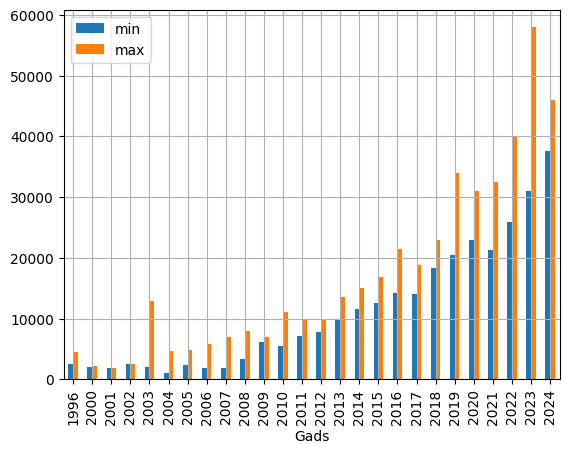

In [57]:
# let us plot rav4_grouped min and max values as single bar plot
# add y grid lines
rav4_grouped[["min", "max"]].plot(kind="bar", grid=True)
# rav4_grouped[["min", "max"]].plot(kind="bar")


<Axes: xlabel='Gads', ylabel='price'>

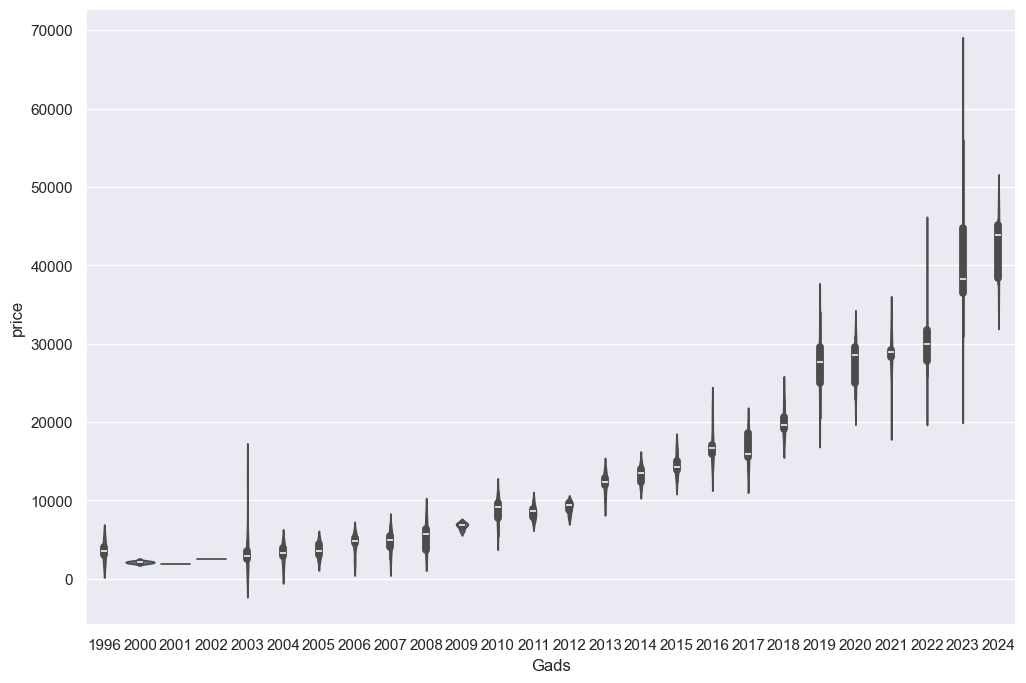

In [60]:
# how about creating a violin plot for rav4 prices
import seaborn as sns # install seaborn with pip install seaborn
# color blind friendly
sns.set_palette("colorblind")
# set size
sns.set(rc={'figure.figsize':(12,8)})
sns.violinplot(data=rav4_df, x="Gads", y="price")

In [ ]:
# TODO converting kilometers to numeric
# TODO comparing how kilometers affect price

In [ ]:
# For better visualizations I highly recommend Plotly library
# docs: https://plotly.com/python/
# install with pip install plotly